In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_final.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,5864.791484,480,5219.889308,4593.730994,4737.952367,0.075206,0.0,2505.270905,4985.686604,5358.364787,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
1,5864.791484,18300,11252.430270,12166.479530,4737.952367,1.063492,-1.0,6122.293626,8621.426035,9007.739139,2273.463724,6873.875154,5919.184856,5862.136698,0.0,1.0
2,5864.791484,9800,13332.624775,4593.730994,10663.846715,0.650794,-1.0,6092.941274,8621.426035,11071.351592,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
3,5864.791484,1500,2828.211457,4593.730994,4737.952367,-0.730159,0.0,6281.659842,4985.686604,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
4,5864.791484,3600,2828.211457,4593.730994,4737.952367,-0.825397,-2.4,6721.586025,8621.426035,6508.064481,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


In [4]:
x= df.drop(columns='price')
y = df[['price']]

In [5]:
y.describe()

,price
count,356209.000000
mean,5919.659879
std,8292.917940
min,1.000000
25%,1299.000000
50%,3150.000000
75%,7500.000000
max,199900.000000


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 6831.29107478],
       [ 5048.56552901],
       [-3023.00209017]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[ 8636.08536665],
       [ 9836.35831872],
       [-4245.22391003]])

In [10]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.572965,3126.430963,2.944630e+07,5426.444819
test,0.579021,3110.402595,2.877201e+07,5363.954923


## Análisis de los datos

## Train

- Los valores que arrojan mis números me indican lo siguiente:
    - El r2 score (0.5729) me dice que mis variables predictoras predicen relativamente bien mi variable respuesta. Pero no tan bien, por lo que podría decir que alguna de mis variables no es la correcta para predecir y esto es consecuencia de que este estadístico asume que todas las variables ayudan a mi predicción.
    - MAE me indica que los precios predichos por mi modelo difieren en 3126.43 para mi train. Se traduce en que esta es la diferencia entre mi valor predicho y el valor real de mis datos. Mis predicciones tienen un error de 3126 en el conjunto de entrenamiento.
    - El MSE mide el error cuadrado promedio de mi predicción, este se refleja en notación científica porque se eleva al cuadrado. Por eso uso mejor el RMSE.
    - El RMSE para train es de 5426.44 Estos datos llevan la raíz cuadrado del valor anterior (MSE), por lo que son menores. Describen la desviación estándar de la diferencia entre el valor esperado y el valor predicho. O de forma más sencilla, es muy similar al MAE pero este tiende a ser más alto porque está afectado por los extremos. Aquí mis predicciones están desviadas en 5426 unidades en mi conjunto train.

## Test

- Los valores que arrojan mis números me indican lo siguiente:
    - El r2 score (0.5790) me dice que mis variables predictoras predicen relativamente bien mi variable respuesta. Pero no tan bien, por lo que podría decir que alguna de mis variables no es la correcta para predecir y esto es consecuencia de que este estadístico asume que todas las variables ayudan a mi predicción.
    - MAE me indica que los precios predichos por mi modelo difieren en 3110 para mi test. Se traduce en que esta es la diferencia entre mi valor predicho y el valor real de mis datos.
    - El MSE mide el error cuadrado promedio de mi predicción, este se refleja en notación científica porque se eleva al cuadrado. Por eso uso mejor el RMSE.
    - El RMSE para train es de 5363. Estos datos llevan la raíz cuadrado del valor anterior (MSE), por lo que son menores. Describen la desviación estándar de la diferencia entre el valor esperado y el valor predicho. O de forma más sencilla, es muy similar al MAE pero este tiende a ser más alto porque está afectado por los extremos.

Puedo señalar que mis datos para el test son ligeramente inferiores que mis datos para eltrain por lo que mi modelo mejora un poco en relación al conjunto test que le he propuesto. A la vez, el r2_score es mejor, aunque a penas, para el conjunto test.

### Underfitting vs Overfitting

- Tomando en consideración el r2_score, si el rendimiento fuese bajo en test pero alto en train sería Overfitting. De igual forma, si el RMSE fuese mucho menor que mi test también estaría hablando sobre Overfitting. Pero en mi caso, no es así ya que tengo datos similares por lo que no está memorizando datos de entrenamiento.

- Para el underfitting, si mi r2_score fuese bajo en ambos grupos (train y test) estaría hablando de underfitting ya que su aprendizaje no habría sido suficiente. De igual forma, 

In [13]:
# Convertir a arrays planos si son multidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

Text(0, 0.5, 'Predicciones (y_test_pred)')

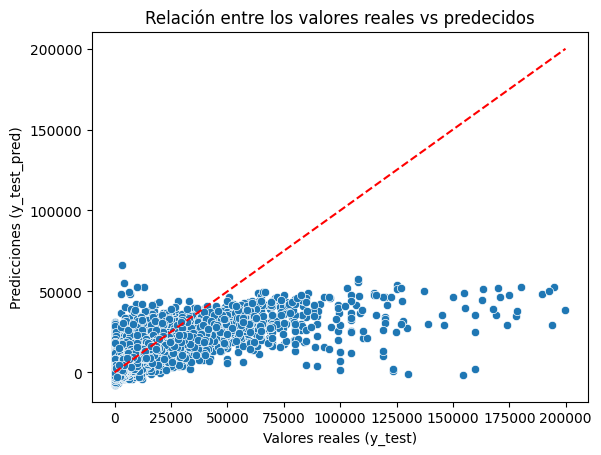

In [14]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

In [ ]:
df.describe() 

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
count,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000,356209.000000
mean,5919.659879,5919.659879,5919.659879,5919.659856,5919.659879,0.073615,-0.974971,5919.659879,5919.658747,5919.659879,5919.659879,5919.659879,5919.517564,5919.290125,0.481835,0.518165
std,124.190273,8292.917940,2712.325394,2890.283713,2472.079944,0.929126,1.588144,1094.955807,1844.877483,3559.070122,1865.884450,1114.565707,36.753549,145.866202,0.499671,0.499671
min,5864.791484,1.000000,2828.211457,4593.730994,3321.785813,-1.825397,-5.800000,2505.270905,3214.502829,1056.773810,2273.463724,4617.801420,5919.184856,5556.204159,0.000000,0.000000
25%,5864.791484,1299.000000,5219.889308,4593.730994,4737.952367,-0.539683,-2.000000,6122.293626,4985.686604,3715.706560,3263.878161,4617.801420,5919.184856,5862.136698,0.000000,0.000000
50%,5864.791484,3150.000000,5219.889308,4593.730994,4737.952367,0.000000,0.000000,6191.361448,4985.686604,5358.364787,7063.780127,6873.875154,5919.184856,5862.136698,0.000000,1.000000
75%,5864.791484,7500.000000,5879.353589,4593.730994,4737.952367,0.444444,0.000000,6366.972981,8621.426035,8378.292269,7063.780127,6873.875154,5919.184856,5862.136698,1.000000,1.000000
max,6200.753949,199900.000000,13332.624775,12984.852888,10663.846715,21.571429,0.000000,6721.586025,16911.874202,39031.203088,7063.780127,6873.875154,9992.024315,9551.918932,1.000000,1.000000


## Interpretación:
- Para este gráfico, lo ideal era trazar una recta diagonal donde los puntos estuvieran siguiendo dicha línea. Eso significa que la predicción y los datos reales son iguales, en el mejor de los casos. En mi caso, mi modelo subestima los valores reales. Esta distribución de puntos está por debajo de la línea por lo que mi predicción es inferior a los datos reales.
- Se nota que al principio hay una buena agrupación de puntos pero a medida que estos son más elevados se dispersan por lo que mi modelo puede tener dificultades para predecir valores más altos.
- Puedo decir que en cuanto a valores pequeños, mi modelo puede predecir con cierto sentido los valores.

# Cross Validation

In [ ]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)